# TD and Q-Learning

In [37]:
#Setting up the Cliff Walking Environment. It is a Grid Problem still

import gym
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

env=gym.make("CliffWalking-v0")


In [2]:
#Rendering the simple enviroment the goal is 'T' , we start in the botton left corner 'x' , state 'C' is the cliff , every step I make has a reward of -1.
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [10]:
#Cliff Waling has 48 possible states and 4 posible actions.
n_state=env.observation_space.n
n_action=env.action_space.n
n_action

4

# Developing the Q learning Algorithm:

In [7]:
# Q-learning just like Montecarlo is a model-free approach
# It updates in every step the Q function
# This is the function we are updating.
# Action are taken given the epsilon greedy model

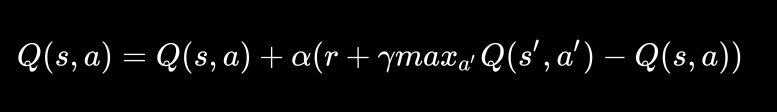

# STEP 1: Define the epsilon greedy policy

In [40]:
def gen_epsilon_greedy_policy(n_action,epsilon):
    def policy_function(state,Q):
        #1.Epsilon is the tradeoff between learning and doing the same action
        #2.In this case is going to give the same probability to all actions. if Epsilon=0.5 tensor(0.0625,0.0625,0.0625,0.0625)
        probs=torch.ones(n_action)*epsilon/n_action
        #3.Determines teh best action given the best option the current state of the Q function. If Q{states} does not exist a new one is created with a random tensor  (xx,xxx,xxx,xxx,xxx)
        best_action=torch.argmax(Q[state]).item()
        #4.It attaches a largest probability to select the best action probs=tensor(0.5625,0.0625,0.0625,0.0625)
        probs[best_action]+=1-epsilon
        #5. Facinating it ends up exploring everything !!! The policy changes at every step! So the action it selections is different
        action=torch.multinomial(probs,1).item()
        return action
    return policy_function

# STEP 2: Define the Q-LEARNING FUNCTION

In [50]:
def q_learning(env,gamma,n_episode,alpha):
    #1.Look at the action space
    n_action=env.action_space.n
    #2.Create the Q-Function to be updates
    Q=defaultdict(lambda:torch.zeros(n_action))
    #3. Run an Episode
    for episode in range(n_episode):
    #4.Reset the enviroment and define variables that define when to stop    
        state=env.reset()
        is_done=False
        while not is_done:
    #5.Generate action based on the episilon greedy policy        
            action=epsilon_greedy_policy(state,Q)
            next_state, reward,is_done,info=env.step(action)
    #6.Temporal DEfirence delta is how much my Q function is being updated!!! (r+ gamma(max(Q(next_state,) - Qstate(action))))        
            td_delta=reward + gamma*torch.max(Q[next_state])-Q[state][action]
    #7.I update the que Q function Value. Q[state][actions] + alpha*td_delta
    #8.Aplpha is my learning rate. How much Am I capturing it is obvious that if alpha is large close to 1 we learn less because that function grows fast
    #9.If a want to spend less time put Alpha large
            Q[state][action]+=alpha*td_delta
    #9.1 We track the lenght and reward of the episode
            length_episode[episode]+=1
            total_reward_episode[episode]+=reward
            if is_done:
                break
    #10. If the episode does not finish In the next iteration in the while loop I generation a new policy and a new action based on the state i am at            
            state=next_state
    #11. For the first episode I have a Q function with all the states I visited and all the values updated    
    #12. When I have my optimum Q I can calculate the optimum policy by simply being greedy and selecting the best course of action for every state
    policy={}
    for state, actions in Q.items():
        policy[state]=torch.argmax(actions).item()
    return Q, policy

# STEP 3: RUNNING THE EXPERIMENT


In [51]:
gamma=1
n_episode=500
alpha=0.4
epsilon=0.1

epsilon_greedy_policy=gen_epsilon_greedy_policy(env.action_space.n,epsilon)

In [52]:
#This is just to keep track of the length
length_episode=[0]*n_episode
total_reward_episode=[0]*n_episode
#Running episode

optimal_Q, optimal_policy=q_learning(env, gamma, n_episode, alpha)

In [53]:
optimal_Q


defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {36: tensor([ -13.0000, -112.9445,  -13.9992,  -13.9968]),
             24: tensor([-13.5834, -12.0000, -14.0000, -12.9998]),
             12: tensor([-13.0142, -12.7392, -12.7020, -13.2130]),
             0: tensor([-12.6976, -12.5122, -12.4501, -12.5440]),
             1: tensor([-12.0000, -11.8022, -12.0261, -12.4972]),
             2: tensor([-11.2429, -11.0415, -11.1945, -11.1279]),
             3: tensor([-10.4000, -10.1809, -10.4771, -10.6374]),
             4: tensor([-9.5936, -9.3603, -9.3557, -9.8025]),
             5: tensor([-8.7643, -8.5159, -8.6066, -8.5158]),
             6: tensor([-7.9870, -7.6525, -7.7721, -8.1389]),
             7: tensor([-6.8000, -6.7329, -6.7913, -6.9376]),
             8: tensor([-5.9502, -5.7896, -5.8577, -6.6387]),
             9: tensor([-5.2000, -4.8686, -4.9109, -5.0849]),
             10: tensor([-4.0000, -3.9392, -3.9618, -4.3149]),
             11: tensor([-3.2000

In [54]:
optimal_policy

{36: 0,
 24: 1,
 12: 2,
 0: 2,
 1: 1,
 2: 1,
 3: 1,
 4: 2,
 5: 3,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 2,
 23: 2,
 22: 2,
 35: 2,
 21: 2,
 20: 1,
 19: 1,
 17: 1,
 16: 2,
 15: 2,
 14: 2,
 13: 2,
 26: 1,
 25: 1,
 18: 1,
 34: 1,
 33: 1,
 47: 0,
 27: 1,
 28: 1,
 32: 1,
 29: 1,
 30: 1,
 31: 1}

In [55]:
#Plotting the length of the episodes to see how long it took us to learn the optimum policy:

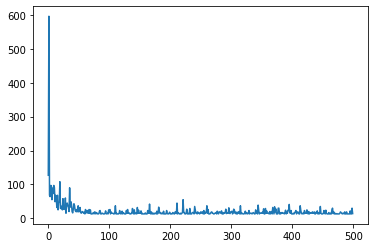

In [56]:
plt.plot(length_episode)

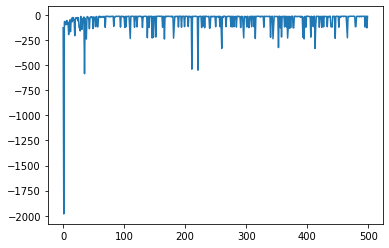

In [57]:
plt.plot(total_reward_episode)